In [1]:
import pandas as pd

from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

from joblib import load
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv("N315output.csv",index_col=False)

In [4]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [5]:
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= df.drop(columns=selected_columns)
y=df["essential"]

In [7]:
model = load("../../../model/RF_model.joblib")

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_rf = []

for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model.fit(X_train_undersampled, y_train_undersampled)
    
    y_pred_fold = model.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    accuracy_rf.append(accuracy_fold)

0.6046511627906976
0.5891472868217055
0.5426356589147286
0.627906976744186
0.5968992248062015
0.5736434108527132
0.562015503875969
0.627906976744186
0.6550387596899225
0.6124031007751938


In [10]:
model_rf_fs = load("../../../model/RF_FS_model.joblib")

In [11]:
accuracy_rf_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_rf_fs, n_features_to_select=9)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_rf_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_rf_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_rf_fs.append(accuracy_fold)

0.7015503875968992
0.7868217054263565
0.7093023255813954
0.8023255813953488
0.6124031007751938
0.7403100775193798
0.6007751937984496
0.6317829457364341
0.6782945736434108
0.6589147286821705


In [13]:
model_xgb = load("../../../model/XGB_model.joblib")
accuracy_xgb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_xgb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_xgb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb.append(accuracy_fold)

0.6434108527131783
0.7093023255813954
0.6705426356589147
0.7054263565891473
0.6744186046511628
0.6589147286821705
0.686046511627907
0.6937984496124031
0.7170542635658915
0.6976744186046512


In [14]:
model_xgb_fs = load("../../../model/XGB_FS_model.joblib")
accuracy_xgb_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_xgb_fs, n_features_to_select=6)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_xgb_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_xgb_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb_fs.append(accuracy_fold)

0.5813953488372093
0.7403100775193798
0.6317829457364341
0.7674418604651163
0.4883720930232558
0.6124031007751938
0.810077519379845
0.8682170542635659
0.627906976744186
0.624031007751938


In [15]:
model_mlp = load("../../../model/MLP_model.joblib")
accuracy_mlp = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_mlp.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_mlp.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_mlp.append(accuracy_fold)

0.6434108527131783
0.6395348837209303
0.6434108527131783
0.6395348837209303
0.6937984496124031
0.624031007751938
0.6744186046511628
0.6356589147286822
0.686046511627907
0.6627906976744186


In [16]:
model_svm = load("../../../model/SVM_model.joblib")
accuracy_svm = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_svm.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_svm.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_svm.append(accuracy_fold)

0.5930232558139535
0.6627906976744186
0.6162790697674418
0.686046511627907
0.6550387596899225
0.6550387596899225
0.6162790697674418
0.6511627906976745
0.689922480620155
0.6666666666666666


In [17]:
model_nb = load("../../../model/NB_model.joblib")
accuracy_nb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_nb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_nb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_nb.append(accuracy_fold)

0.42248062015503873
0.4496124031007752
0.4418604651162791
0.5426356589147286
0.4883720930232558
0.4573643410852713
0.4728682170542636
0.5
0.5503875968992248
0.4806201550387597


In [26]:
models = ['Random Forest', 'XGBoost', 'Naive Bayes', 'MLP', 'SVM']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf).mean(), pd.Series(accuracy_xgb).mean(), pd.Series(accuracy_nb).mean(), pd.Series(accuracy_mlp).mean(), pd.Series(accuracy_svm).mean()],
    'Variance': [pd.Series(accuracy_rf).var(), pd.Series(accuracy_xgb).var(), pd.Series(accuracy_nb).var(), pd.Series(accuracy_mlp).var(), pd.Series(accuracy_svm).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_N315accuracy.csv', index=False)

In [25]:
models = ['Random Forest', 'XGBoost']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf_fs).mean(), pd.Series(accuracy_xgb_fs).mean()],
    'Variance': [pd.Series(accuracy_rf_fs).var(), pd.Series(accuracy_xgb_fs).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_N315fs_accuracy.csv', index=False)

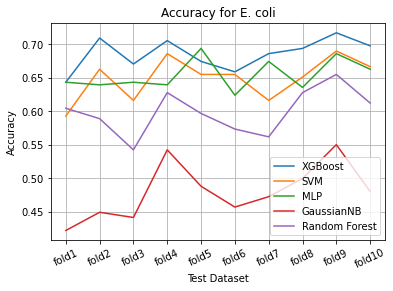

In [23]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb, label='XGBoost')
plt.plot(x, accuracy_svm, label='SVM')
plt.plot(x, accuracy_mlp, label='MLP')
plt.plot(x, accuracy_nb, label='GaussianNB')
plt.plot(x, accuracy_rf, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('N315.jpg')
plt.show()

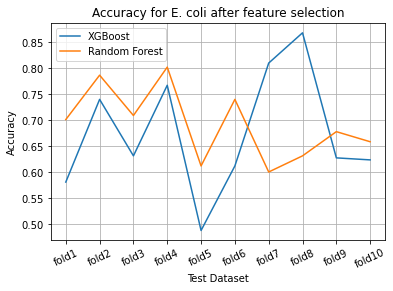

In [24]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb_fs, label='XGBoost')
plt.plot(x, accuracy_rf_fs, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli after feature selection')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('N315_fs.jpg')
plt.show()